   TransactionID  Amount  Location  MerchantCategory  CardHolderAge  IsFraud
0              1   375.0         1                 4             18        0
1              2   951.0         2                 1             28        0
2              3   732.0         3                 4             20        0
3              4   599.0         4                 3             69        0
4              5   157.0         4                 3             79        0
IsFraud
0    409
1     23
Name: count, dtype: int64
Confusion Matrix:
[[82  0]
 [ 5  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        82
           1       0.00      0.00      0.00         5

    accuracy                           0.94        87
   macro avg       0.47      0.50      0.49        87
weighted avg       0.89      0.94      0.91        87

AUC-ROC Score: 0.34756097560975613


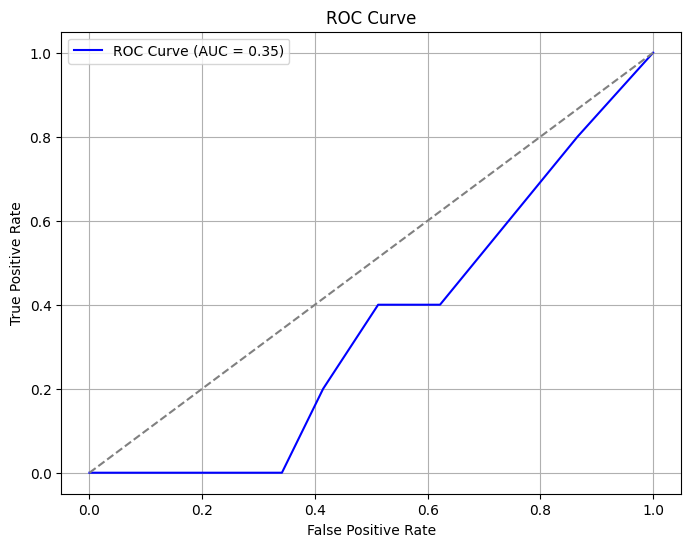

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
df = pd.read_csv('fraud_data.csv')
df['Amount'] = df['Amount'].replace(',', '', regex=True).astype(float)
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['MerchantCategory'] = le.fit_transform(df['MerchantCategory'])
print(df.head())
print(df['IsFraud'].value_counts())


X = df.drop(['IsFraud'], axis=1)
y = df['IsFraud']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [5]:
df['IsFraud'].value_counts()

IsFraud
0    409
1     23
Name: count, dtype: int64

array([[<Axes: title={'center': 'CardHolderAge'}>,
        <Axes: title={'center': 'IsFraud'}>]], dtype=object)

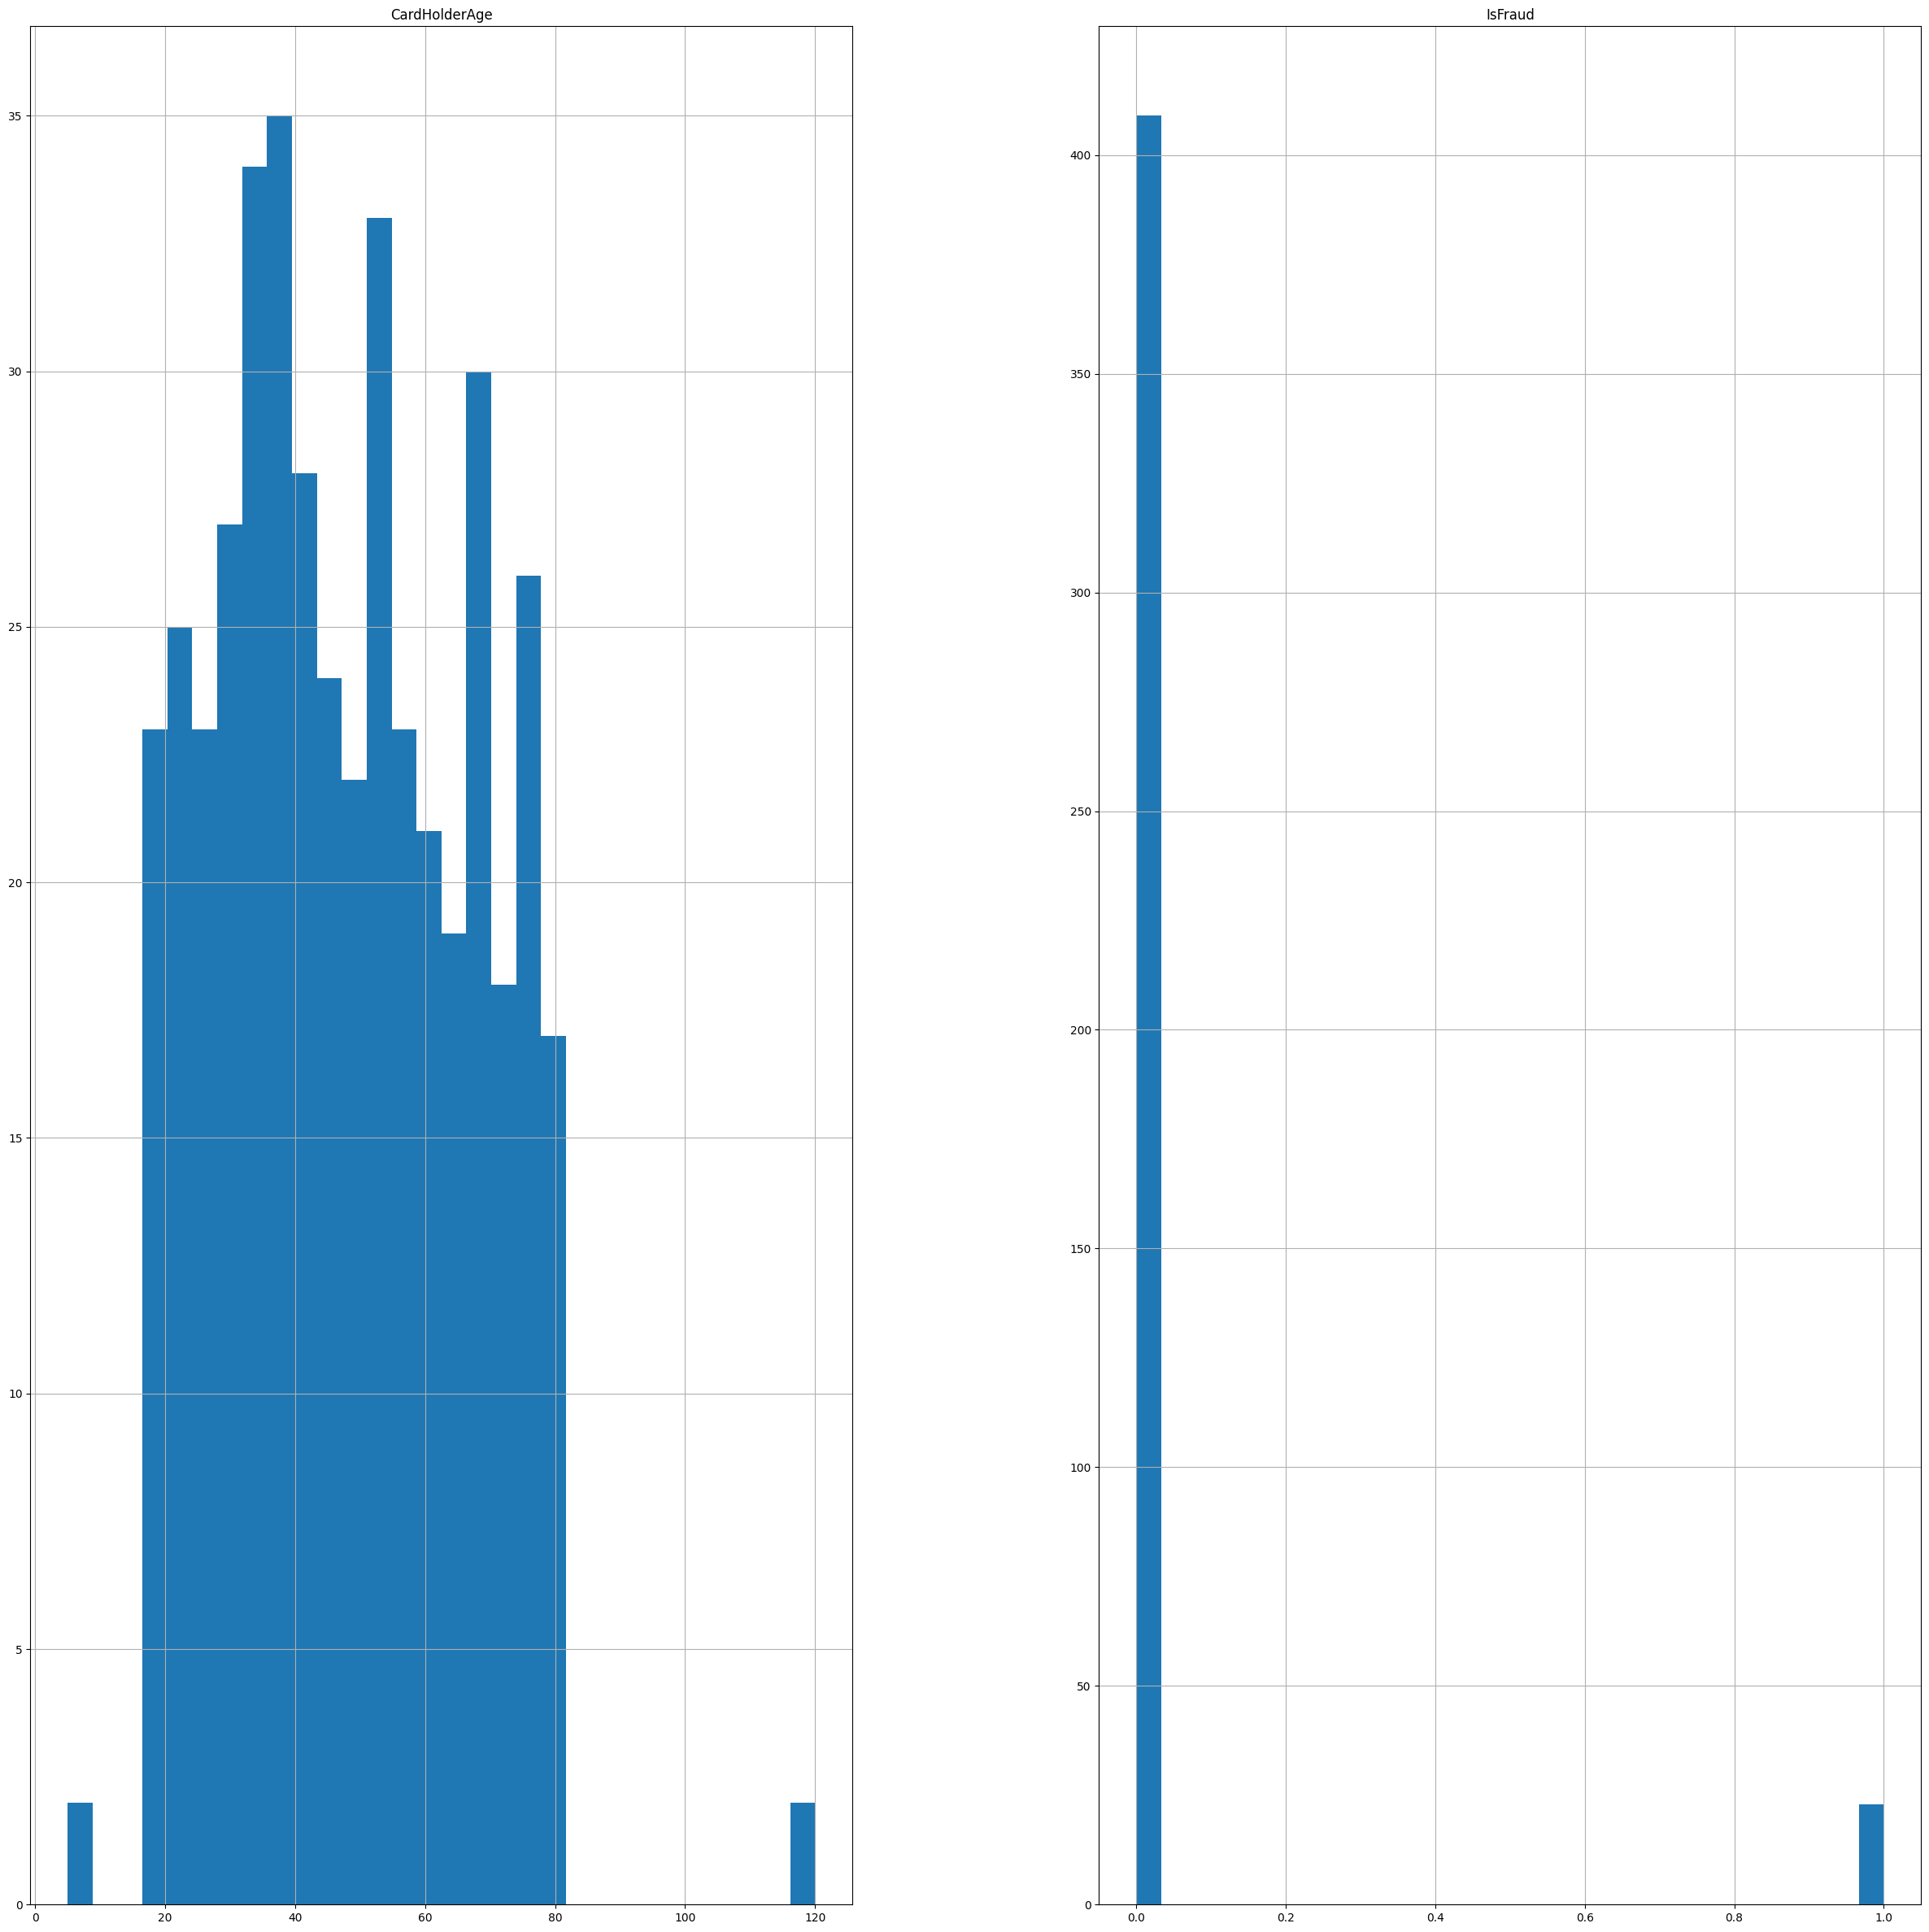

In [10]:
df.hist(bins=30, figsize=(30,30))

In [9]:
df = df.drop('TransactionID', axis=1)

<Axes: >

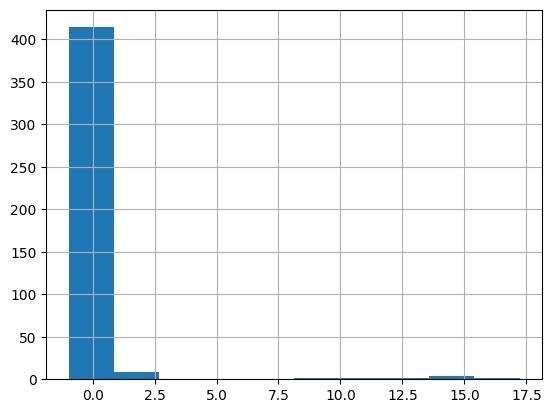

In [13]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = new_df['Amount'].replace(',', '', regex=True).astype(float)
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

In [14]:
new_df['Amount'].describe()

count    432.000000
mean       0.252999
std        2.047752
min       -0.965258
25%       -0.517371
50%        0.000000
75%        0.482629
max       17.224413
Name: Amount, dtype: float64

In [15]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Amount,Location,MerchantCategory,CardHolderAge,IsFraud
292,-0.086385,Miami,Groceries,33,0
365,-0.146479,Chicago,Entertainment,50,0
366,0.691080,Chicago,Travel,73,0
119,-0.292958,New York,Entertainment,56,0
236,0.523944,Miami,Electronics,34,0
...,...,...,...,...,...
255,0.193427,Los Angeles,Travel,71,0
72,-0.390610,Miami,Clothing,77,0
396,-0.754930,New York,Entertainment,63,0
235,-0.033803,Chicago,Electronics,41,0


NameError: name 'train_np' is not defined